In [1]:
# Import the requests library.
%matplotlib inline
import requests
import random
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import json
import os 
#Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import timeit.
import timeit

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress 

# Import the time module.
import time


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

4.37 ms ± 409 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
#In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so 
#that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a 
#variable.
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there 
#are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude 
#and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes 
#and longitudes into the coordinates list before moving on.

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

pangkalanbuun id
khatanga ru
rokiskis lt
kavieng pg
bonga et
jamestown sh
atuona pf
xapuri br
ushuaia ar
hithadhoo mv
castro cl
mataura pf
srednekolymsk ru
menongue ao
hlobyne ua
kapaa us
yellowknife ca
saldanha za
mineiros br
hobart au
nicoya cr
winnemucca us
umzimvubu za
pevek ru
mys shmidta ru
hilo us
kamaishi jp
taolanaro mg
ushuaia ar
smolenka ru
rikitea pf
tasiilaq gl
filadelfia py
heihe cn
halalo wf
amderma ru
molochnoye ru
sao joao da barra br
yarovoye ru
grand gaube mu
punta arenas cl
zalantun cn
bagdarin ru
kapaa us
carnarvon au
sola vu
poum nc
tsihombe mg
miraflores co
liuzhou cn
makurdi ng
nabire id
saldanha za
curitiba br
mahebourg mu
eyl so
toliary mg
rikitea pf
ayan ru
victoria sc
te anau nz
puerto ayora ec
barrow us
codrington ag
robstown us
avarua ck
saint marys us
bethel us
hermanus za
karaul ru
ribeira grande pt
cape town za
dikson ru
khatanga ru
cherskiy ru
bluff nz
udachnyy ru
qaanaaq gl
georgetown sh
blagoyevo ru
solnechnyy ru
asau tv
rikitea pf
albany au
comodoro

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

653

# 6.2.4: Get Data from a Response

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

#When we run this cell the output is "<Response [200]>."
#When we receive a valid response from the server, we have to decide on the data format. The options are text, JSON, XML, 
#or HTML format. We can apply the format attributes to get the data into a useful format to parse.
#One format that provides a preview of the JSON data is the text attribute. Let's get the content for the Boston weather 
#data using the following code.

<Response [200]>

In [9]:
# Get the text of the 'Get' request.
city_weather.text
#The text in the output is a dictionary of dictionaries and arrays, or a JSON file. We can work with this data, but it 
#might be more challenging if we needed to retrieve temperature (temp) and humidity ( humidity) from this output because 
#the data is in a sentence format.

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":52.57,"feels_like":29.93,"temp_min":51.8,"temp_max":53.01,"pressure":1004,"humidity":58},"visibility":10000,"wind":{"speed":35.68,"deg":280,"gust":55.23},"clouds":{"all":54},"dt":1616815756,"sys":{"type":1,"id":4967,"country":"US","sunrise":1616754996,"sunset":1616799771},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [10]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 52.57,
  'feels_like': 29.93,
  'temp_min': 51.8,
  'temp_max': 53.01,
  'pressure': 1004,
  'humidity': 58},
 'visibility': 10000,
 'wind': {'speed': 35.68, 'deg': 280, 'gust': 55.23},
 'clouds': {'all': 54},
 'dt': 1616815756,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1616754996,
  'sunset': 1616799771},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

# 6.2.4: Handle Request Errors

In [11]:

#When we submit a get request for the city_weather, we want to make sure that we get a valid response, i.e., 200, before 
#we retrieve any data. To check if we get a valid response, we can write a conditional expression that will evaluate 
#whether the status code is equal to 200. If it is, then we can print out a statement that says the weather data was found. 
#If there is a response other than 200, we can print out a statement that says the weather was not found, as in the 
#following example:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
#When the conditional expression is evaluated, it will print City weather found if true, or City weather not found if false.
#When we run the cell code above, the output is City weather found.

City Weather found.


# Module 6.2.5: Parse a Response from an API

In [12]:

#Before we collect weather data from more than 500 cities, we'll walk through how to get the weather data from Boston. 
#First, correct the spelling for the city of Boston to get a valid URL
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 52.57,
  'feels_like': 29.93,
  'temp_min': 51.8,
  'temp_max': 53.01,
  'pressure': 1004,
  'humidity': 58},
 'visibility': 10000,
 'wind': {'speed': 35.68, 'deg': 280, 'gust': 55.23},
 'clouds': {'all': 54},
 'dt': 1616815756,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1616754996,
  'sunset': 1616799771},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:

#let's assign a variable to the city_weather.json() data to the variable "boston_data" 
# Get the JSON data.
boston_data = city_weather.json()

In [14]:
boston_data['sys']['country']

'US'

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# 6.2.5: Convert the Date Timestamp

In [17]:
#Let's convert the date from the Boston weather data in the JSON format to the ISO format

# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 3, 27, 3, 29, 16)

In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

# 6.2.6: Get the City Weather Data

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#In the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each 
#recorded response and the set to start at 1.

Beginning Data Retrieval     
-----------------------------


In [20]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | pangkalanbuun
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | rokiskis
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | bonga
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | xapuri
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | srednekolymsk
Processing Record 14 of Set 1 | menongue
Processing Record 15 of Set 1 | hlobyne
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | mineiros
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | nicoya
Processing Record 22 of Set 1 | winnemucca
Processing Record 23 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 24 of Set 1 | pevek
Pr

In [21]:
# tally the number of cities in the city_data array
len(city_data)

603

# 6.2.7: Create a DataFrame of City Weather Data

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pangkalanbuun,-2.6833,111.6167,85.53,65,83,3.31,ID,2021-03-27 03:29:45
1,Khatanga,71.9667,102.5000,5.97,87,96,5.08,RU,2021-03-27 03:32:10
2,Rokiskis,55.9667,25.5833,38.71,82,81,5.59,LT,2021-03-27 03:32:11
3,Kavieng,-2.5744,150.7967,83.98,72,78,12.80,PG,2021-03-27 03:32:11
4,Bonga,7.2833,36.2333,58.60,85,65,2.08,ET,2021-03-27 03:28:28
5,Jamestown,42.0970,-79.2353,42.01,100,90,2.39,US,2021-03-27 03:32:09
6,Atuona,-9.8000,-139.0333,81.03,75,57,19.26,PF,2021-03-27 03:32:12
7,Xapuri,-10.6517,-68.5044,72.52,95,56,2.46,BR,2021-03-27 03:32:12
8,Ushuaia,-54.8000,-68.3000,46.40,76,75,5.75,AR,2021-03-27 03:31:37
9,Hithadhoo,-0.6000,73.0833,83.16,71,8,8.39,MV,2021-03-27 03:32:13


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pangkalanbuun,ID,2021-03-27 03:29:45,-2.6833,111.6167,85.53,65,83,3.31
1,Khatanga,RU,2021-03-27 03:32:10,71.9667,102.5000,5.97,87,96,5.08
2,Rokiskis,LT,2021-03-27 03:32:11,55.9667,25.5833,38.71,82,81,5.59
3,Kavieng,PG,2021-03-27 03:32:11,-2.5744,150.7967,83.98,72,78,12.80
4,Bonga,ET,2021-03-27 03:28:28,7.2833,36.2333,58.60,85,65,2.08
...,...,...,...,...,...,...,...,...,...
598,Bakaly,RU,2021-03-27 03:35:57,55.1789,53.8028,33.19,98,100,9.80
599,Kochi,IN,2021-03-27 03:35:58,9.9399,76.2602,86.00,74,40,3.44
600,Mayo,US,2021-03-27 03:35:58,38.8876,-76.5119,62.60,48,1,16.11
601,Gao,ML,2021-03-27 03:35:59,16.6362,1.6370,70.00,11,0,22.75


In [24]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [25]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pangkalanbuun,ID,2021-03-27 03:29:45,-2.6833,111.6167,85.53,65,83,3.31
1,Khatanga,RU,2021-03-27 03:32:10,71.9667,102.5000,5.97,87,96,5.08
2,Rokiskis,LT,2021-03-27 03:32:11,55.9667,25.5833,38.71,82,81,5.59
3,Kavieng,PG,2021-03-27 03:32:11,-2.5744,150.7967,83.98,72,78,12.80
4,Bonga,ET,2021-03-27 03:28:28,7.2833,36.2333,58.60,85,65,2.08
...,...,...,...,...,...,...,...,...,...
598,Bakaly,RU,2021-03-27 03:35:57,55.1789,53.8028,33.19,98,100,9.80
599,Kochi,IN,2021-03-27 03:35:58,9.9399,76.2602,86.00,74,40,3.44
600,Mayo,US,2021-03-27 03:35:58,38.8876,-76.5119,62.60,48,1,16.11
601,Gao,ML,2021-03-27 03:35:59,16.6362,1.6370,70.00,11,0,22.75


# 6.3.1 Plot Latitude vs. Temperature

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Get today's date in seconds.
today = time.time()
today

1616816160.261518

In [28]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/26/21'

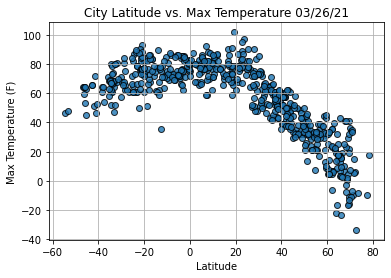

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

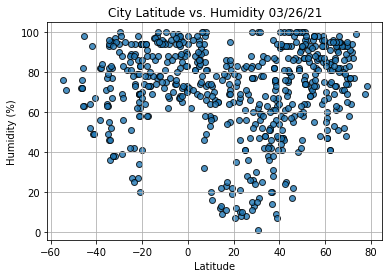

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

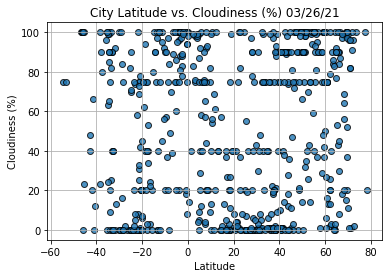

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

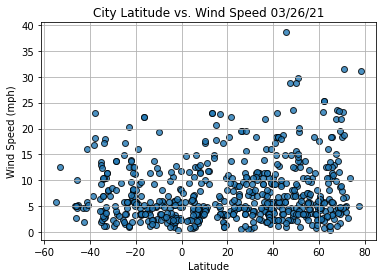

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig4.png")
# Show plot.
plt.show()

# 6.4.1 Use Linear Regression to Find the Relationship Between Variables

In [33]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [34]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [35]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

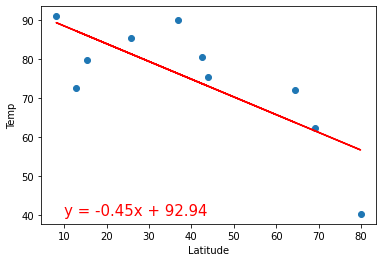

In [36]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [37]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Temp')
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                     Menongue
Country                        AO
Date          2021-03-27 03:32:14
Lat                      -14.6585
Lng                        17.691
Max Temp                    61.86
Humidity                       97
Cloudiness                    100
Wind Speed                   2.21
Name: 13, dtype: object

In [39]:
#We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere 
#latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code 
#city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these 
#criteria.

city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
598     True
599     True
600     True
601     True
602     True
Name: Lat, Length: 603, dtype: bool

In [40]:
#If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use 
#the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter 
#city_data_df["Lat"] >= 0

city_data_df.loc[(city_data_df["Lat"] >= 0)].head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Khatanga,RU,2021-03-27 03:32:10,71.9667,102.5000,5.97,87,96,5.08
2,Rokiskis,LT,2021-03-27 03:32:11,55.9667,25.5833,38.71,82,81,5.59
4,Bonga,ET,2021-03-27 03:28:28,7.2833,36.2333,58.60,85,65,2.08
5,Jamestown,US,2021-03-27 03:32:09,42.0970,-79.2353,42.01,100,90,2.39
12,Srednekolymsk,RU,2021-03-27 03:32:13,67.4500,153.6833,6.46,71,18,4.18
14,Hlobyne,UA,2021-03-27 03:32:14,49.3878,33.2596,38.44,91,100,7.29
15,Kapaa,US,2021-03-27 03:32:15,22.0752,-159.3190,77.00,78,75,5.75
16,Yellowknife,CA,2021-03-27 03:27:41,62.4560,-114.3525,7.00,85,40,5.75
20,Nicoya,CR,2021-03-27 03:32:16,10.1483,-85.4520,80.60,57,0,17.27
21,Winnemucca,US,2021-03-27 03:32:16,40.9730,-117.7357,39.20,41,1,5.75


In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

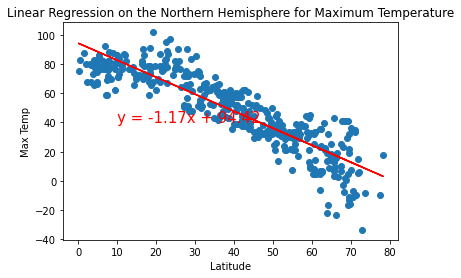

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))
plt.show()

# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

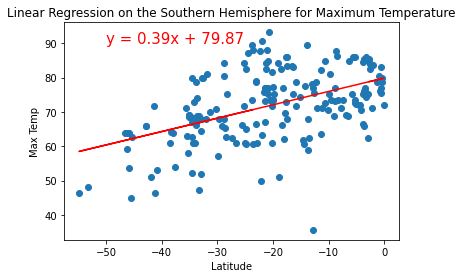

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

# Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

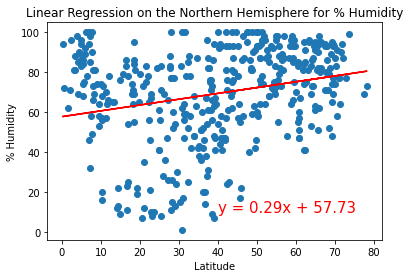

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

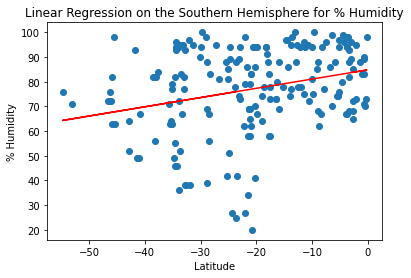

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

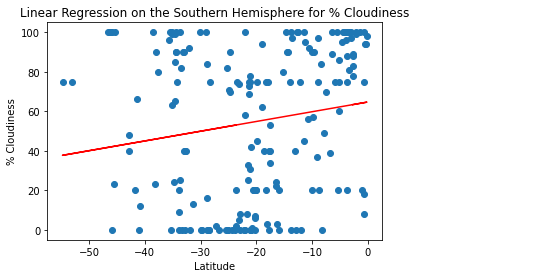

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(10,60))

# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

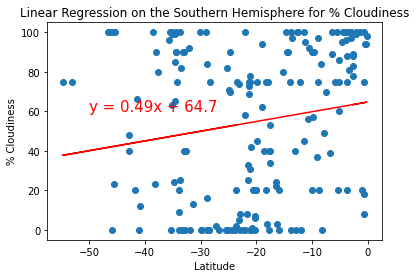

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

# Perform Linear Regression on the Wind Speed for the Northern Hemisphere

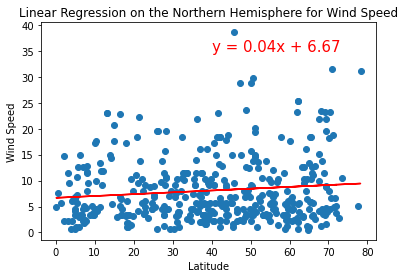

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

# Perform Linear Regression on the Wind Speed for the Southern Hemisphere

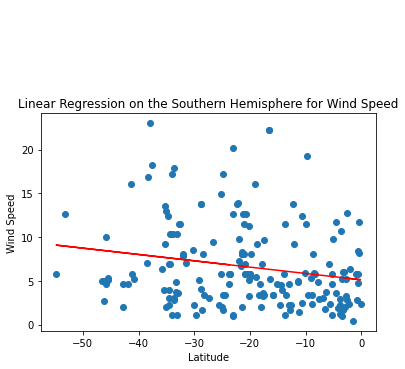

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

C:\Users\hira_\.conda\envs\PythonData\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hira_\.conda\envs\PythonData\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


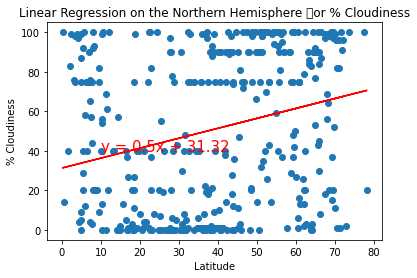

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \for % Cloudiness', '% Cloudiness', (10,40))